# Classificando um Pokémon como Lendário

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Análise Exploratória dos Dados

    Vamos fazer uma pequena análise dos dados para entender o que podemos usar como variável explicatória para  classificação que desejamos fazer.

In [29]:
pokemon = pd.read_csv('Pokemon-dataset.csv')

In [30]:
pokemon.head(13)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [31]:
lendarios=pokemon[pokemon['Legendary']==True]
lendarios.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


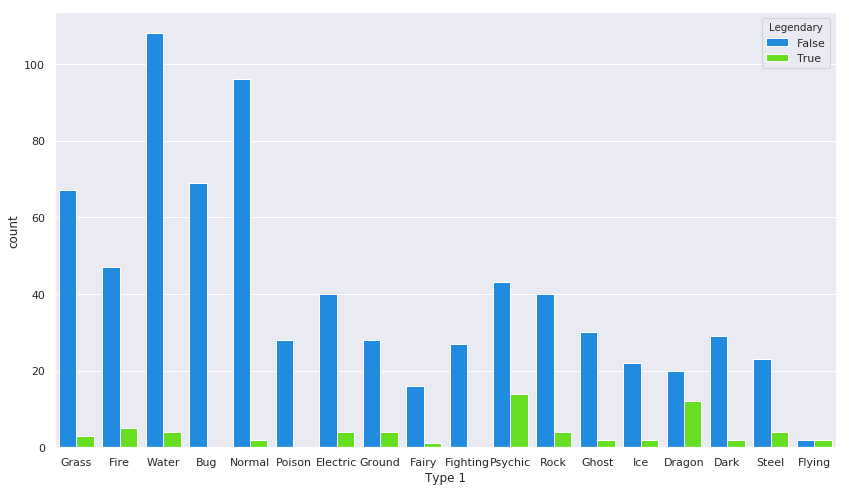

In [32]:
fig = plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
sns.countplot(x="Type 1", hue="Legendary", data=pokemon, palette="gist_rainbow_r" )

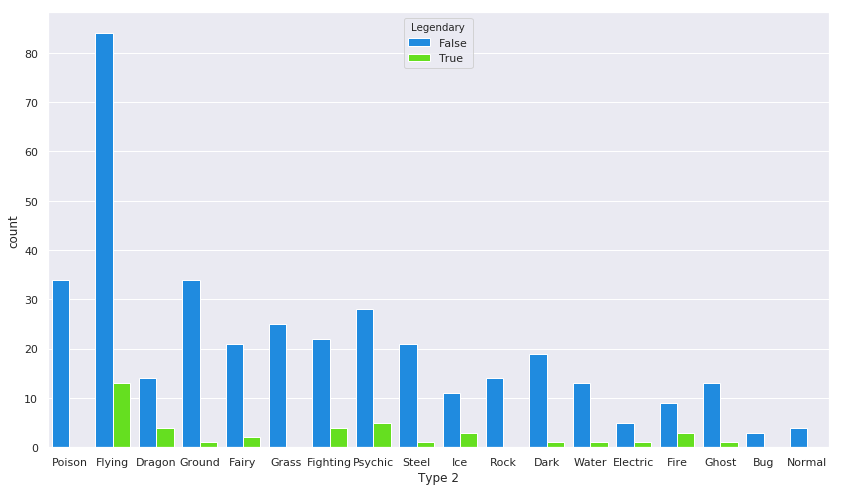

In [33]:
fig = plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
sns.countplot(x="Type 2", hue="Legendary", data=pokemon, palette='gist_rainbow_r')

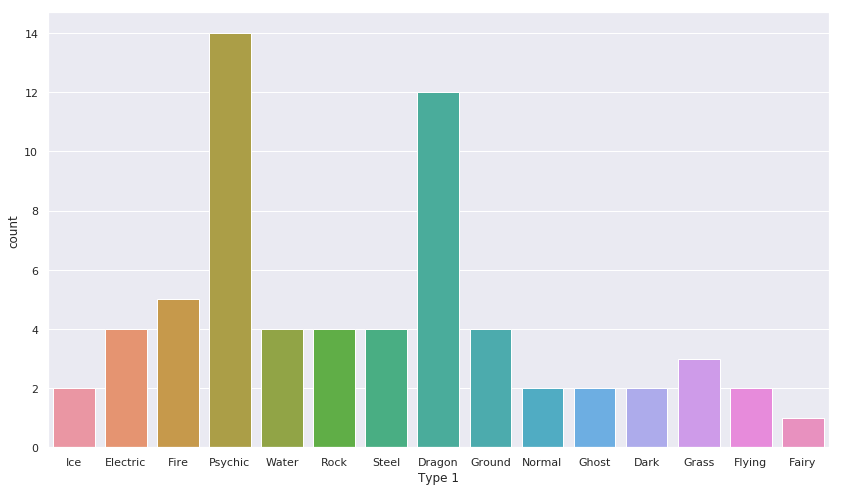

In [34]:
rotulos = lendarios["Type 1"].values
fig = plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
sns.countplot(x=lendarios["Type 1"], data=lendarios)

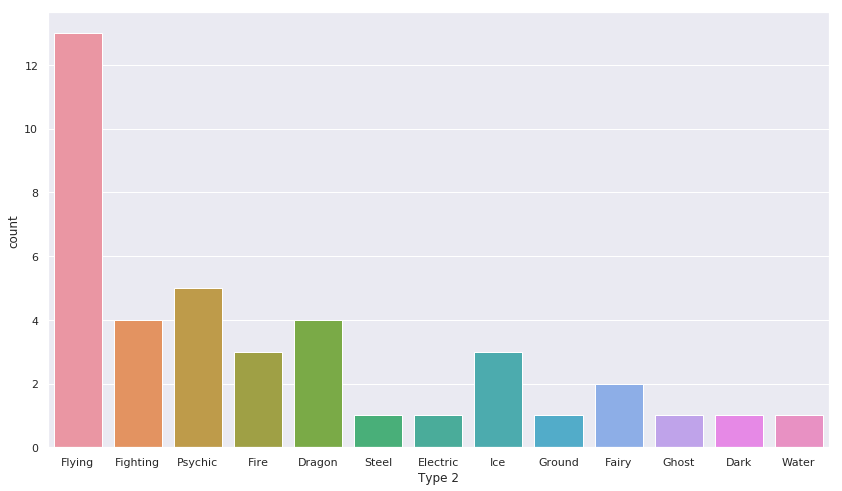

In [35]:
rotulos = lendarios["Type 1"].values
fig = plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
sns.countplot(x=lendarios["Type 2"], data=lendarios)

    Poderíamos calcular as probabilidades marginais, conhecendo os tipos mais comuns de pokémons
    lendários, como feito abaixo:
   

In [36]:
pokemon[pokemon["Type 1"]=="Psychic"]["Legendary"].value_counts()

False    43
True     14
Name: Legendary, dtype: int64

In [37]:
pokemon[pokemon["Type 1"]=="Dragon"]["Legendary"].value_counts()

False    20
True     12
Name: Legendary, dtype: int64

In [39]:
# A probabilidade de um pokémon do tipo (1) psiquíco ser um pokémon lendário é:
print(14/57)
# A probabilidade de um pokémon do tipo (1) dragão ser um pokémon lendário é:
print(12/32)

0.24561403508771928
0.375


### Vamos tentar outra abordagem

In [40]:
# Criando um dataset sem nenhuma variável categórica, exceto "Legendary"
pokemon_valores = pokemon.drop(["Generation","Type 2","Type 1","Name", "#"], axis=1)

In [41]:
pokemon_valores.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False


Text(0, 0.5, 'Defesa Especial')

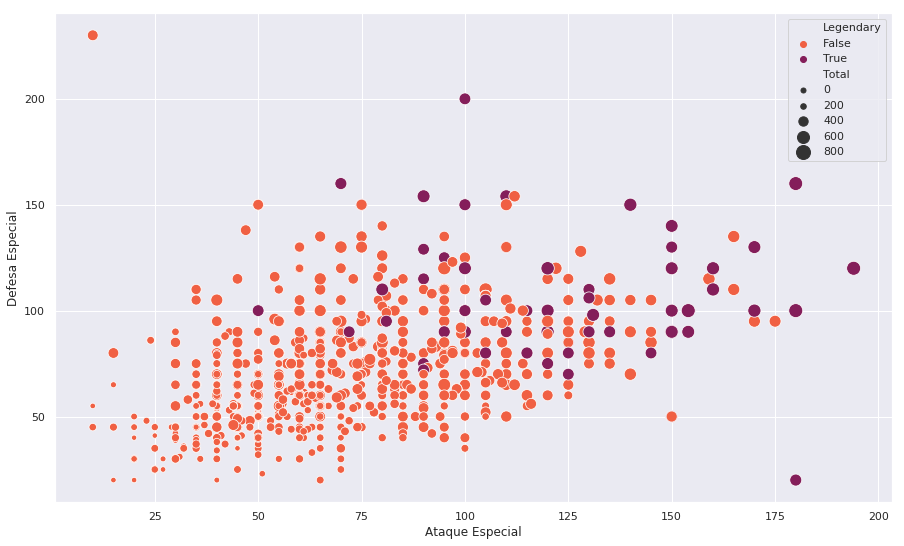

In [42]:
fig = plt.figure(figsize=(15,9))
sns.set(style="darkgrid")
sns.scatterplot(x="Sp. Atk",y="Sp. Def",data=pokemon_valores, 
                hue="Legendary", size="Total", sizes=(25,195), palette="rocket_r")
plt.xlabel("Ataque Especial")
plt.ylabel("Defesa Especial")

    Da pra ver que pokémons lendários no geral tem valores altos para os atributos 
    Sp. Atk e Sp. Def combinados!

Text(0, 0.5, 'Defesa')

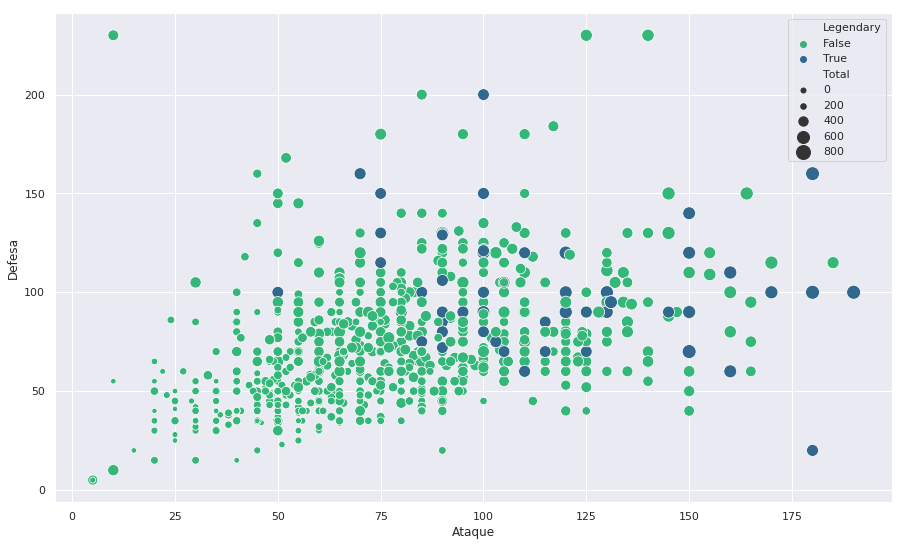

In [43]:
fig = plt.figure(figsize=(15,9))
sns.set(style="darkgrid")
sns.scatterplot(x="Attack",y="Defense",data=pokemon_valores, 
                hue="Legendary", size="Total", sizes=(25,195), palette="viridis_r")
plt.xlabel("Ataque")
plt.ylabel("Defesa")

    Podemos dizer o mesmo em relação à ataque e defesa!
    Vamos então usar um método de classificação, o escolhido foi o KNN    

In [44]:
# Importando tudo que vamos precisar:

from sklearn.model_selection import train_test_split                 # para dividir o dataset em treino e teste
from sklearn.neighbors import KNeighborsClassifier                   # para instanciar um KNN
from sklearn.metrics import classification_report,confusion_matrix   # para verificar a qualidade dos resultados


      Usamos o train_test_split() para dividir o dataset em um dataset de treino e outro de teste. ele retornará uma tupla, que em sequência, é constituída de variável explicativa de treino (X_treino), variável explicativa de teste, X_teste seguida das variáveis de resposta de treino e teste, y_treino e y_teste 
    respectivamente.
      Primeiro devemos criar um dataframe que não contém a coluna lendário, e passar como primeiro parâmetro 
    para o método train_test_split(), e em seguida a própria coluna "Legendary", que será a variável explica
    tiva, por fim o tamanho do dataset de treino, em geral escolhe-se o equivalente a um terço do 
    dataset original.

In [45]:
params_ = pokemon_valores.drop("Legendary", axis=1)
params_.head(6)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
5,405,58,64,58,80,65,80


    Agora sim,

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(params_,pokemon["Legendary"],test_size=0.33)

    Para o aloritmo KNN é preciso que seja fornecido um valor de K, para que nossa precisão seja boa
    o suficiente. Existe problema ao escolher um valor muito alto do K, ele pode acabar enviesado
    (retornando com maior probabilidade a categoria que aparece com maior frequência)

Text(0, 0.5, 'Taxa de Erro')

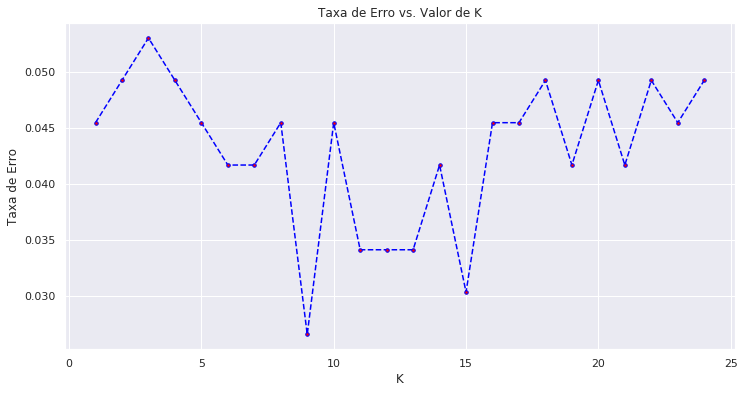

In [51]:
taxa_de_erro = []

treino_scores = []
teste_scores  = []

for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino,y_treino)
    predic_i = knn.predict(X_teste)
    taxa_de_erro.append(np.mean(predic_i != y_teste))
    treino_scores.append(knn.score(X_treino,y_treino))
    teste_scores.append(knn.score(X_teste,y_teste))

    
# Vamos observar o erro dado o valor de K
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,25),taxa_de_erro,color='blue', linestyle='dashed', marker='.',
         markerfacecolor='red', markersize=7)
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
    

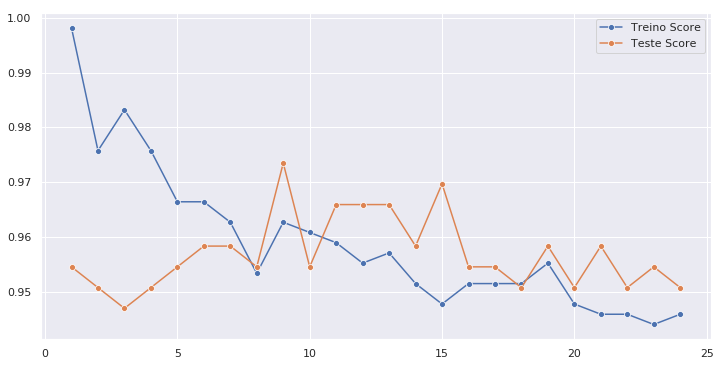

In [57]:
plt.figure(figsize=(12,6))
ax1=sns.lineplot(range(1,25),treino_scores,marker='o',label='Treino Score')
ax2=sns.lineplot(range(1,25),teste_scores,marker='o',label='Teste Score')

        O valor de K que vamos escolher é 15.

In [66]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_treino,y_treino)
predic = knn.predict(X_teste)

In [67]:
# Vamos observar nossa matriz de confusão:
print(confusion_matrix(y_teste,predic))
# E o status do modelo:
print(classification_report(y_teste,predic))

[[240   3]
 [  5  16]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       243
        True       0.84      0.76      0.80        21

   micro avg       0.97      0.97      0.97       264
   macro avg       0.91      0.87      0.89       264
weighted avg       0.97      0.97      0.97       264



In [64]:
bulbasauro = np.array([318,45,49,49,65,65,45])
bulbasauro = bulbasauro.reshape(1,-1)
predic2 = knn.predict(bulbasauro)
print(predic2)

[False]


In [65]:
megalomon_e_juca = ([720,150,124,126,112,118,90], [433,94,120,44,60,55,60])

predic3 = knn.predict(megalomon_e_juca)
print(predic3)

[ True False]
